In [1]:
import torch

# Creating tensors
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

# Element-wise addition
result = torch.add(x, y)  # or result = x + y
print(result)

# Element-wise subtraction
result = torch.sub(x, y)  # or result = x - y
print(result)

# Element-wise multiplication
result = torch.mul(x, y)  # or result = x * y
print(result)

# Element-wise division
result = torch.div(x, y)  # or result = x / y
print(result)

# Matrix multiplication
result = torch.matmul(x, y)  # or result = x @ y
print(result)

tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19, 22],
        [43, 50]])


In [2]:
import torch

# Create a tensor with requires_grad=True to track computation
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Perform a computation
z = x**2 + y**3

# Compute gradients
z.backward()

# Gradients are stored in .grad attribute of tensors
print(x.grad)  # Output: 4.0
print(y.grad)  # Output: 27.0

tensor(4.)
tensor(27.)


Epoch [1/10], Loss: 0.7437
Epoch [2/10], Loss: 0.7401
Epoch [3/10], Loss: 0.7366
Epoch [4/10], Loss: 0.7335
Epoch [5/10], Loss: 0.7305
Epoch [6/10], Loss: 0.7277
Epoch [7/10], Loss: 0.7251
Epoch [8/10], Loss: 0.7226
Epoch [9/10], Loss: 0.7204
Epoch [10/10], Loss: 0.7182


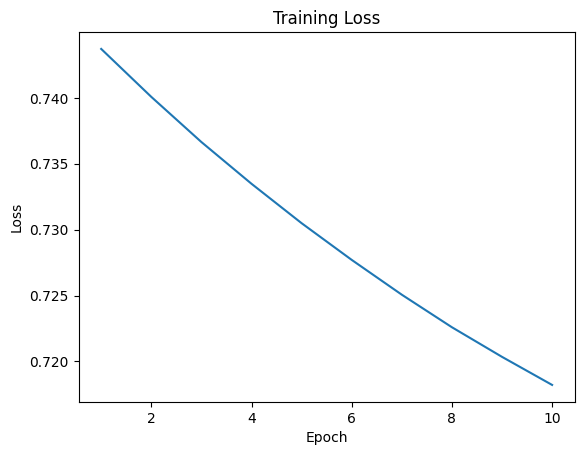

In [ ]:
#simple program with tensor data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Create a dummy dataset
X_train = torch.randn(1000, 10)  # 1000 samples with 10 features each
y_train = torch.randint(0, 2, (1000,))  # Binary labels

# Create a TensorDataset
train_dataset = TensorDataset(X_train, y_train)

# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(10, 1)  # Linear layer with input size 10 and output size 1

    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Sigmoid activation for binary classification

# Instantiate the neural network
model = SimpleNN()

# Define the loss function
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
losses = []  # To store the loss values
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, targets in train_dataloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(), targets.float())  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    losses.append(epoch_loss)

# Plot the loss over epochs
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [3]:
import torch
import torch.nn.functional as F

# Applying activation functions
x = torch.randn(5)

# Sigmoid activation function
sigmoid_output = torch.sigmoid(x)

# ReLU activation function
relu_output = F.relu(x)

# Tanh activation function
tanh_output = torch.tanh(x)

In [4]:
import torch
import torch.nn as nn

# Define and train a model
model = nn.Linear(10, 1)
# Training code...
# Save the model
torch.save(model.state_dict(), 'model.pth')

# Load the model
model = nn.Linear(10, 1)
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [ ]:
#converting random online dataset into trainable tensors
import pandas as pd
import numpy as np

# Load the dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Combine the data into feature and target arrays
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert to PyTorch tensors
boston_data_tensor = torch.tensor(data, dtype=torch.float32)
boston_target_tensor = torch.tensor(target, dtype=torch.float32)

print("Data tensor size:", boston_data_tensor.size())
print("Target tensor size:", boston_target_tensor.size())

Data tensor size: torch.Size([506, 13])
Target tensor size: torch.Size([506])


In [ ]:
#simple Sequential model using static input
import torch
import torch.nn as nn

# Step 2: Define input size, hidden layer size, output size, and batch size
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# Step 3: Create dummy input and target tensors (data)
x = torch.randn(batch_size, n_in)
y = torch.tensor([[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])

# Step 4: Create a sequential model
model = nn.Sequential(
    nn.Linear(n_in, n_h),
    nn.ReLU(),
    nn.Linear(n_h, n_out),
    nn.Sigmoid()
)

# Step 5: Construct the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 6: Implement the gradient descent model
for epoch in range(50):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print('Epoch:', epoch, 'Loss:', loss.item())

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.25369173288345337
Epoch: 1 Loss: 0.2535414397716522
Epoch: 2 Loss: 0.2533915638923645
Epoch: 3 Loss: 0.2532420754432678
Epoch: 4 Loss: 0.2530929446220398
Epoch: 5 Loss: 0.2529442012310028
Epoch: 6 Loss: 0.2527958154678345
Epoch: 7 Loss: 0.2526478171348572
Epoch: 8 Loss: 0.2525002360343933
Epoch: 9 Loss: 0.2523530125617981
Epoch: 10 Loss: 0.25220611691474915
Epoch: 11 Loss: 0.25205960869789124
Epoch: 12 Loss: 0.25191348791122437
Epoch: 13 Loss: 0.25176769495010376
Epoch: 14 Loss: 0.2516222894191742
Epoch: 15 Loss: 0.2514772117137909
Epoch: 16 Loss: 0.251332551240921
Epoch: 17 Loss: 0.25118815898895264
Epoch: 18 Loss: 0.2510441839694977
Epoch: 19 Loss: 0.250900536775589
Epoch: 20 Loss: 0.2507571876049042
Epoch: 21 Loss: 0.2506142556667328
Epoch: 22 Loss: 0.25047165155410767
Epoch: 23 Loss: 0.2503293752670288
Epoch: 24 Loss: 0.2501874566078186
Epoch: 25 Loss: 0.25004586577415466
Epoch: 26 Loss: 0.2499045878648758
Epoch: 27 Loss: 0.24976365268230438
Epoch: 28 Loss: 0.24962